<a href="https://colab.research.google.com/github/Nickguild1993/Practices_python_ML/blob/main/Kmeans_Exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unsupervised Learning- Clustering

***K-Means Clustering***

Clustering technique utilized for grouping datapoints into clusters.

Centroids are the central points used to create those clusters.
- By measuring the distance of each point from the centroids, you are able to "categorize" them to that cluster.
- Then you try to improve the model by *adjusting* the centroids to find what you could think of as a central hub.
- **Goal** is to continue recomputing the clusters until the given data points stop changing clusters

**The Challenge** of clustering is to determine the correct amount of clusters for fitting the data points.
- **SOLUTION:** utlize the **Elbow Method** to determine the diminishing returns cutoff point. (elbow point = inflection point)
- id est. you ascertain the ideal number of clusters by adding additional centroids until increasing their number *does not improve* the modeling of the data.
- Using the Sum of Square Error for each cluster.  (SSE2)

### Initial steps - importing requisite libraries and data for analysis.

In [1]:
# import dependencies 

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# get data


from google.colab import files
uploaded = files.upload()


Saving creditcard_clustering_data.csv to creditcard_clustering_data.csv


In [3]:
# create a DataFrame
import io

df = pd.read_csv(io.BytesIO(uploaded["creditcard_clustering_data.csv"]))
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### First look at the DataFrame

In [4]:
df.shape

(8950, 18)

In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Data Cleaning

In [13]:
# because python notation is case sensitive, it's easier to make all columns lower case
# for calling them.

df.columns = df.columns.str.lower()
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'minimum_payments_new', 'credit_limit_new'],
      dtype='object')

In [7]:
# Checking null values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [8]:
# Impute the null values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

X = df["minimum_payments"].values.reshape(-1,1)
X = imputer.fit_transform(X)

df["minimum_payments_new"] = X

In [9]:
df["minimum_payments_new"].head()

0     139.509787
1    1072.340217
2     627.284787
3     312.343947
4     244.791237
Name: MINIMUM_PAYMENTS_NEW, dtype: float64

In [10]:
X2 = df["credit_limit"].values.reshape(-1,1)
X2 = imputer.fit_transform(X2)

df["credit_limit_new"] = X2

In [14]:
print(df.columns)

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'minimum_payments_new', 'credit_limit_new'],
      dtype='object')


Since we imputed the two columns containing null values (minimum_payments & credit_limit) we can drop the original versions.

In [16]:
# DROP THEM NULLS

df.drop(columns=["minimum_payments", "credit_limit"], axis=1, inplace=True)

# parameters -> axis = 1 means that we're dropping labels from the columns (1)
# instead of the *index* which would be written as axis = 0 (which is also the default)

# inplace = True | Having this parameter as True does the dropping operation in the given DataFrame
# instead of creating a a copy.  deault is false, so keep that in mind.

In [17]:
df.isnull().sum().sum()
# All null values have been removed, without having to drop the rows!

0

Now that we've dropped the two old columns that had the nulls, lets rename the _new columns as the original.

In [30]:
# rename the 2 "_new" columns
df = df.rename(columns={"minimum_payments_new" : "minimum_payments", "credit_limit_new" : "credit_limit"})

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,prc_full_payment,tenure,minimum_payments,credit_limit
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,312.343947,7500.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,325.594462,0.500000,6,48.886365,1000.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,275.861322,0.000000,6,312.343947,1000.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,81.270775,0.250000,6,82.418369,1000.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,52.549959,0.250000,6,55.755628,500.0


Additionally, we're going to drop the "cust_id" column becuase   **A)**   that's just serving as superfluous index  **B)**  it should have zero bearing on the analysis, and it's continued inclusion will do nothing but cloud the outputs.

In [19]:
# Customer ID is redunant to the index, and also isn't a useful feature.  BURN IT
df.drop("cust_id", axis=1,inplace=True)

# Notice that dropping a single column does not require brackets like in the above .drop
# which did require [ ] because we were dropping multiple columns

It's best practice to check your DataFrame after doing multiple transformations to ensure that the changes you've made have been applied properly.  Especially when the specific transformation doesn't return a visual representation of said transformation as the output

In [31]:
df.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,prc_full_payment,tenure,minimum_payments,credit_limit
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,201.802084,0.000000,12,139.509787,1000.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,4103.032597,0.222222,12,1072.340217,7000.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,622.066742,0.000000,12,627.284787,7500.0


### Initial Bivariate Analysis with Visualizations

<Figure size 1152x864 with 0 Axes>

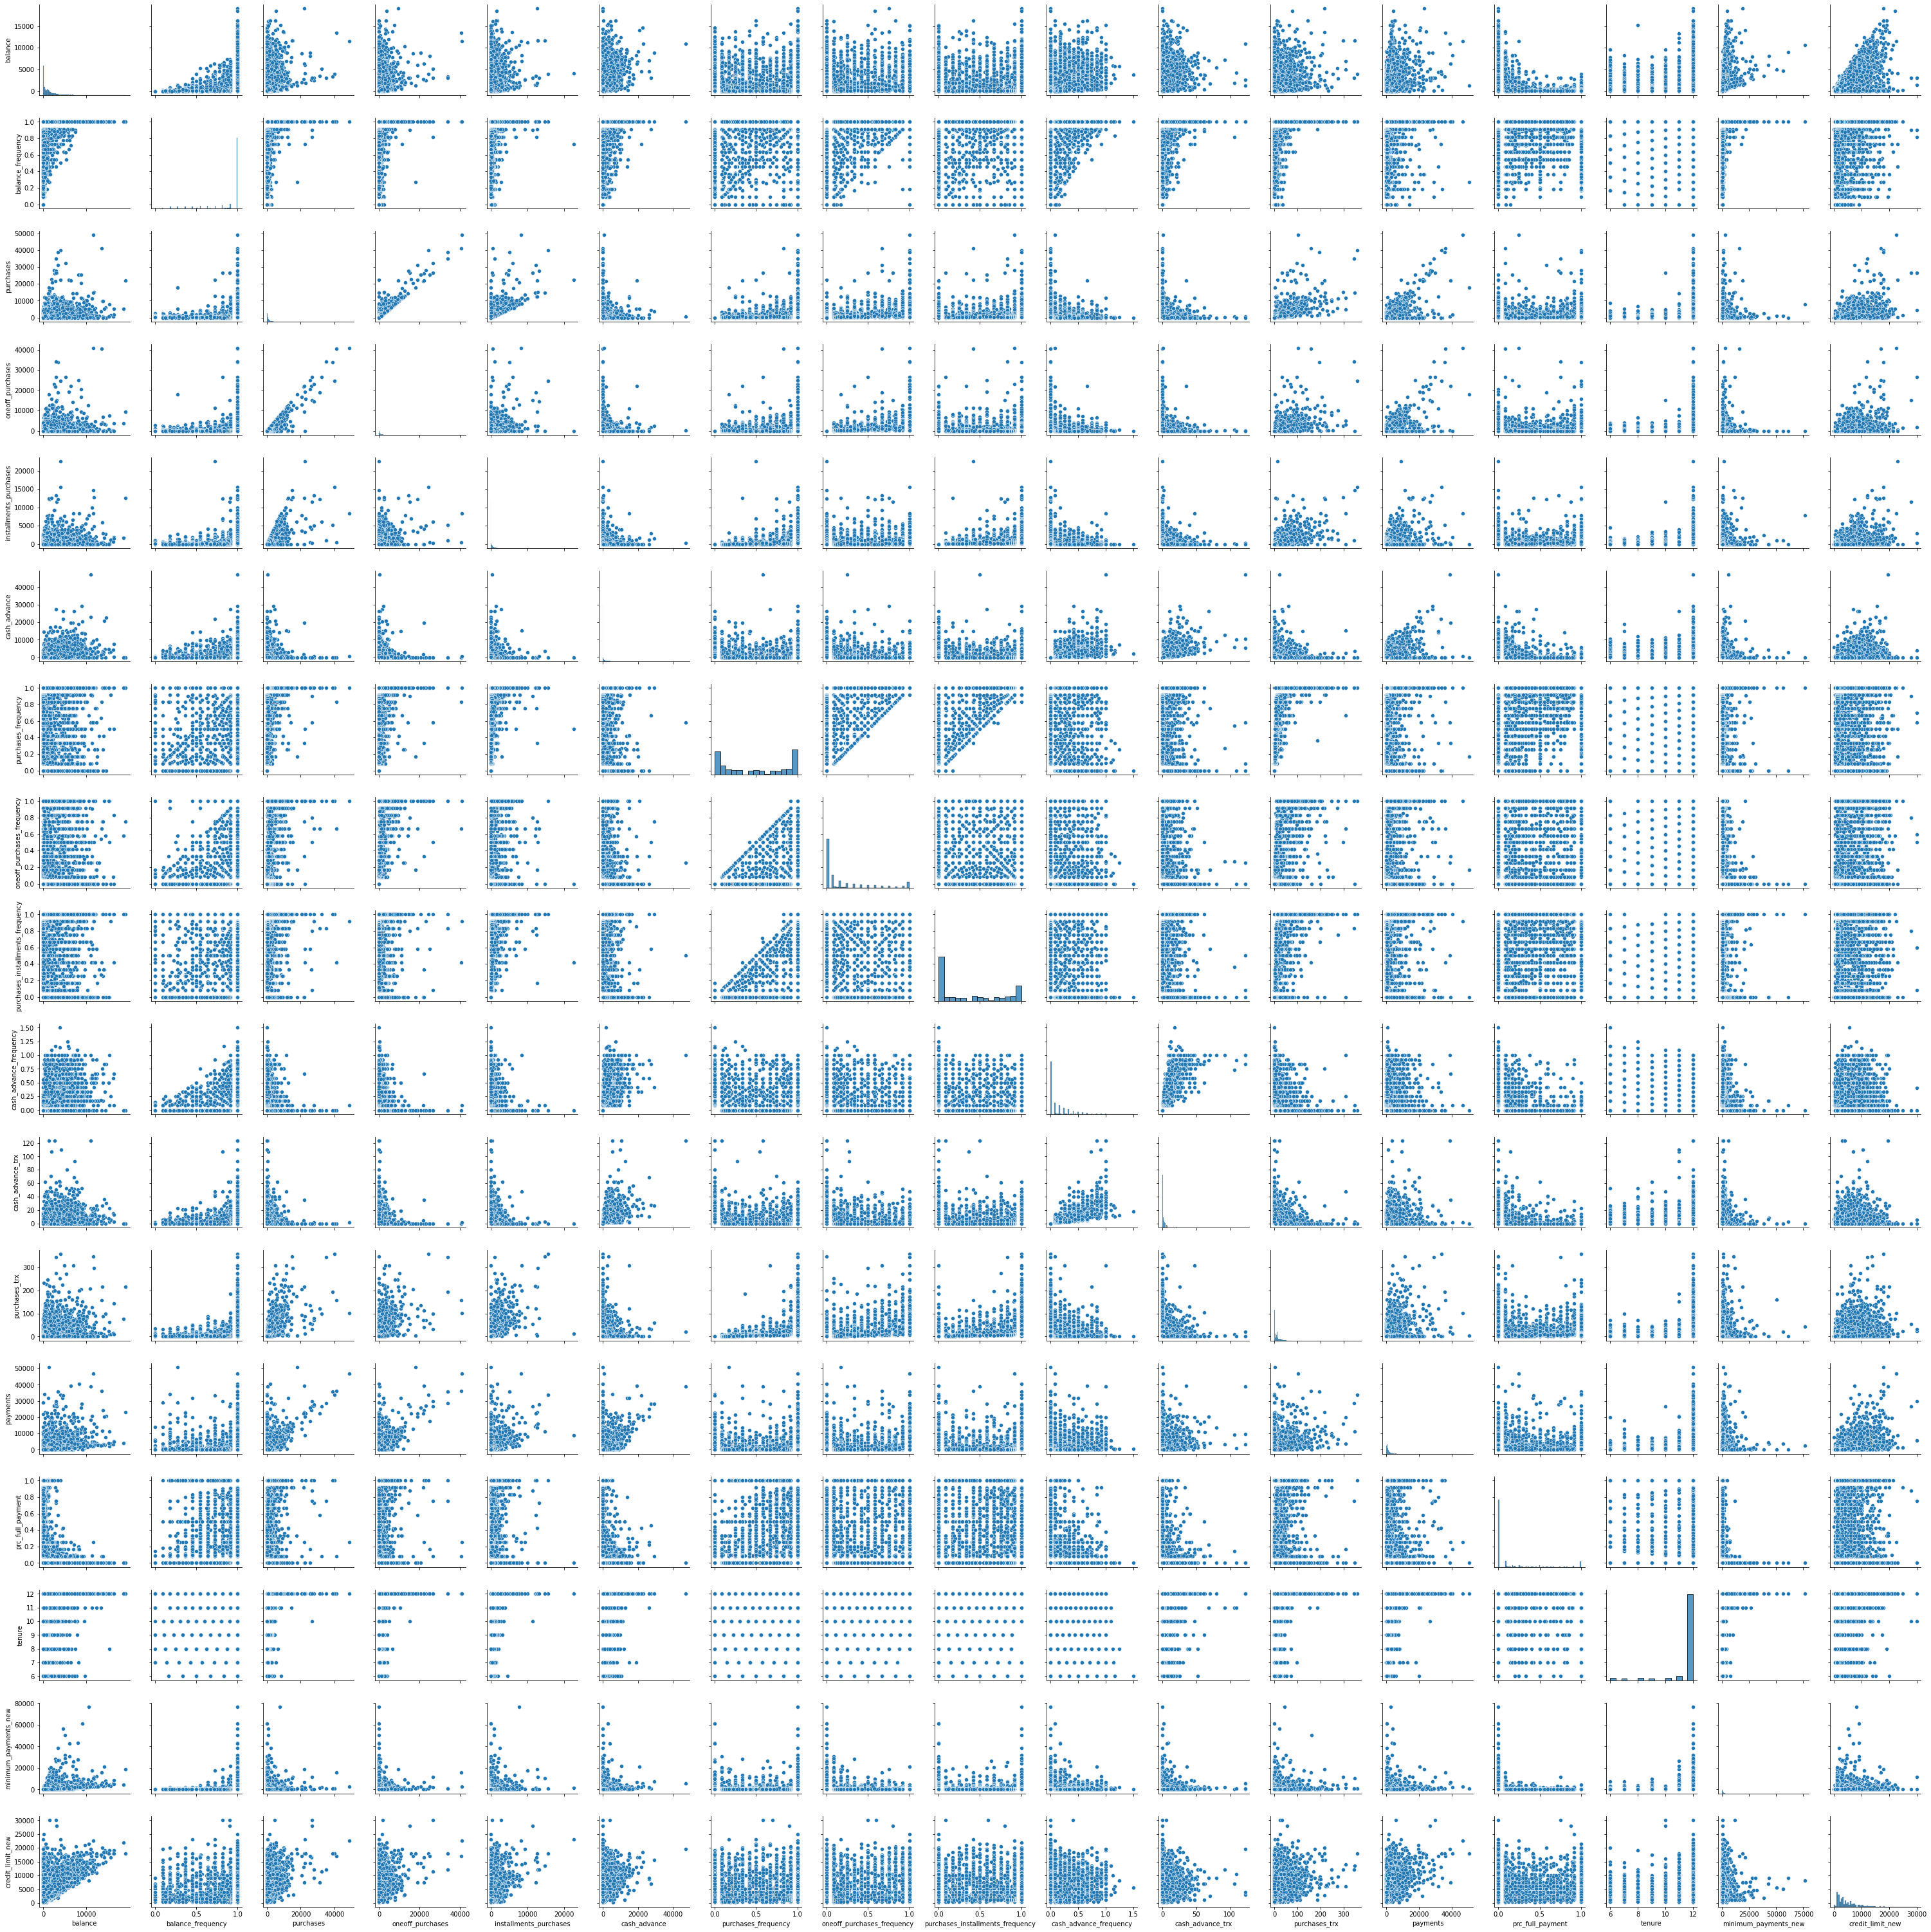

In [21]:
plt.figure(figsize=(16,12))

sns.pairplot(df)
plt.show()

In [ ]:
# While pairplots are a great tool to visualize relationships, in this analysis becuase we have so many features to examine, it's 
# almost impossible to read this graphs, must less draw conclusions.

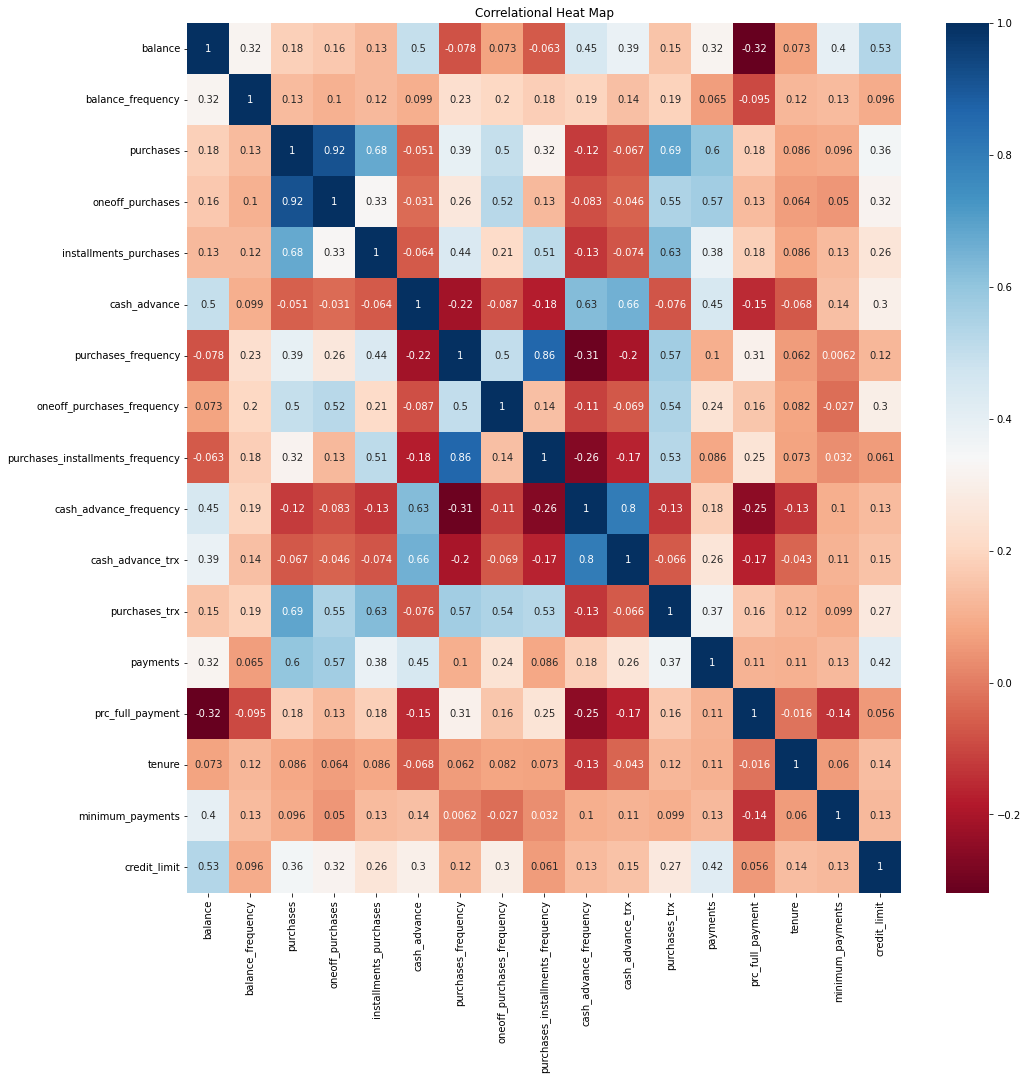

In [32]:
# Create a heatmap to better examine the relationships 

# If you want to change the figure size, make sure that you put it above the code that creates/defines the visualzation!
plt.figure(figsize=(16,16))

plt.rcParams.update({"font.size" : 10})

corr_df = df.corr()
sns.heatmap(corr_df, annot=True, cmap="RdBu")
plt.title("Correlational Heat Map")
plt.show()

Findings:
- As credit limit increase, so does the account balance
- As the total number of purchases increases, the number of said purchases paid for in installments increases.
- As account balance increases, the number of full payments decreases.
- There is a weak positive relationship between tenure of the account holder and their balance.

### Model building

In [33]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = .30, random_state = 13)
# test_size is the ratio of train : test data.  Default is .25 for the test size.  Bumping it up to .30 so it's hopefully more generalizable
# random_state ensures that your train/test splits are reproducible (you'd use the same random_state to recreate the same splits)

### Normalize the values

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train = scaler.fit_transform(df_train)

df_test = scaler.fit_transform(df_test)

In [36]:
# using PowerTransformer to make the data more Gaussian
from sklearn.preprocessing import PowerTransformer
# default method for transformer is Yeo-Johnson (takes both positive AND negative values)
# if you select method = "box-cox" it can only take POSITIVE inputs.
power = PowerTransformer(method="yeo-johnson")

df_train = power.fit_transform(df_train)

# don't want to fit_transform the test data, only transform it.
df_test = power.transform(df_test)

### K-Means

In [37]:
# import KMeans

from sklearn.cluster import KMeans

Finding the ideal number of clusters

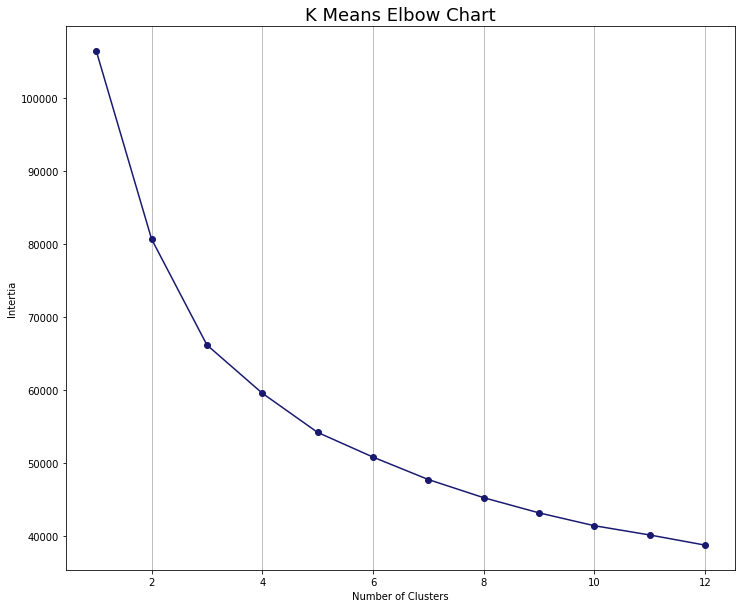

In [43]:
# create an empty list
clusterdistance = []

for clusters in range(1,13):
  km = KMeans(n_clusters = clusters, init="k-means++", max_iter=250, random_state=13)
  km.fit(df_train)
  clusterdistance.append(km.inertia_)


# Plotting values
plt.figure(figsize=(12,10))
plt.plot(range(1,13), clusterdistance, marker="o", color="midnightblue")
plt.xlabel("Number of Clusters")
plt.ylabel("Intertia")
plt.title("K Means Elbow Chart", fontsize=18)
plt.grid(axis="x")
plt.show()



In [45]:
# 5 clusters seems about right- the slop is very gradual after that.
# Could argue for 4 clusters, but let's try 5


# km = KMeans(n_clusters=5, random_state=13) --> get the same result. if we had set random_state = 0 from the beginning, wouldn't even have to include that.
km = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300, random_state=13)

km.fit(df_train)

y_pred = km.predict(df_train)

In [46]:
# check y_prediction
y_pred

array([4, 1, 4, ..., 0, 0, 0], dtype=int32)

In [58]:
df_cluster_scaled = pd.DataFrame(df_train, columns = df.columns)
df_cluster_scaled["clusters"] = y_pred
df_cluster_scaled.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,prc_full_payment,tenure,minimum_payments,credit_limit,clusters
0,-0.752855,0.633823,1.050348,0.781558,1.421437,-0.758408,1.228486,0.439670,1.385365,-0.881177,-0.815036,1.416501,0.255522,-0.677199,0.424103,-0.687820,0.771657,4
1,-0.800704,0.633823,-0.646947,-0.775827,-0.073993,-0.758408,-0.083320,-0.908686,0.468972,-0.881177,-0.815036,-0.390097,-1.178462,-0.677199,0.424103,-0.650802,-1.326828,1
2,1.133057,0.633823,1.402276,1.906285,-0.871960,-0.758408,-0.766965,0.439670,-1.004266,-0.881177,-0.815036,-0.805880,-0.491509,-0.677199,0.424103,0.556182,0.890043,4
3,-1.072528,0.633823,0.617772,-0.775827,1.562585,-0.758408,1.228486,-0.908686,1.148810,-0.881177,-0.815036,0.169860,-0.276218,1.776527,-2.407487,-0.857731,-1.326828,1
4,0.913364,0.633823,2.121519,2.148673,-0.871960,-0.758408,0.705126,1.625938,-1.004266,-0.881177,-0.815036,1.479433,1.951344,0.410189,0.424103,1.959922,-0.021042,4


In [50]:
# check cluster distribution
df_cluster["clusters"].value_counts()

3    1511
0    1467
1    1372
4    1193
2     722
Name: clusters, dtype: int64

### Visualizing Clusters

In [57]:
print(df.shape)
print(df_cluster.shape)

(8950, 17)
(6265, 18)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


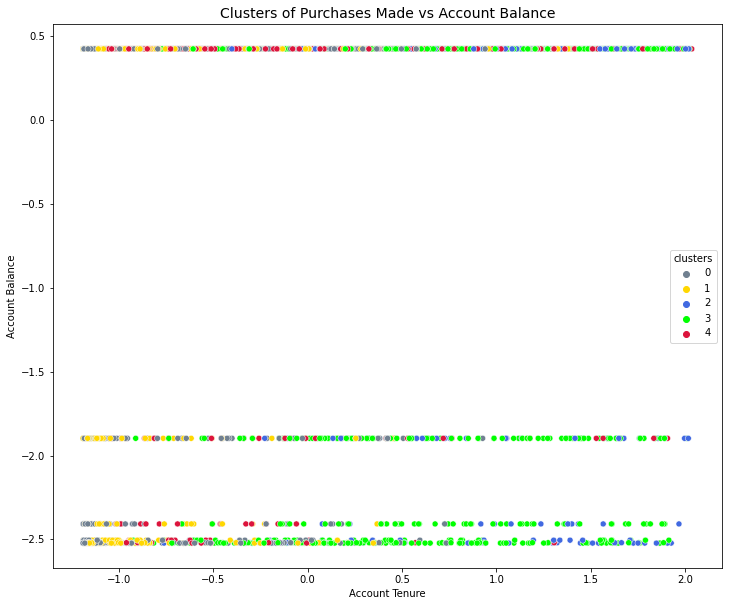

In [61]:
plt.figure(figsize=(12,10))
sns.scatterplot(df_cluster_scaled["balance"], df_cluster_scaled["tenure"], hue= df_cluster_scaled["clusters"],
                palette = ["slategray", "gold", "royalblue", "lime", "crimson"])
plt.title("Clusters of Purchases Made vs Account Balance", fontsize=14)
plt.xlabel("Account Tenure")
plt.ylabel("Account Balance")
plt.show()


Text(0.5, 0, 'Age')

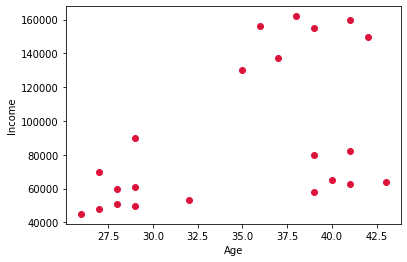

In [11]:
plt.scatter(df["Age"], df["Income($)"], color="crimson")
plt.ylabel("Income")
plt.xlabel("Age")

In [12]:
# Looks like 3 clusters
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
# fit and predict
y_pred = km.fit_predict(df[["Age", "Income($)"]])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [14]:
# Add y_pred into DF

df["cluster"] = y_pred
df.head(3)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0


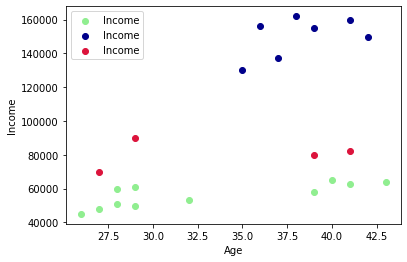

In [19]:
# Check it in scatter
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["Age"], df1["Income($)"], color="lightgreen", label="Income")
plt.scatter(df2["Age"], df2["Income($)"], color="darkblue", label="Income")
plt.scatter(df3["Age"], df3["Income($)"], color="crimson", label="Income")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(loc ="upper left")


In [25]:
# above scatterplot isn't scaled properly

# to fix, going to scale

scaler = MinMaxScaler()
# altering the values to a range of 0-1
scaler.fit_transform(df["Income($)"])
# df["Income($)"]= scaler.transform(df["Income($)"])

scaler.fit_transform(df["Age"])
# df["Age"] = scaler.transform(df["Age"])


ValueError: ignored